# Analisa COVID Nasional

In [1]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')
print (resp)

<Response [200]>


In [2]:
cov_id_raw = resp.json()

In [ ]:
from pandas.io.json import json_normalize
cov_id_df = json_normalize(cov_id_raw)
cov_id_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,data.id,data.jumlah_odp,data.jumlah_pdp,data.total_spesimen,data.total_spesimen_negatif,update.penambahan.jumlah_positif,update.penambahan.jumlah_meninggal,update.penambahan.jumlah_sembuh,update.penambahan.jumlah_dirawat,update.penambahan.tanggal,update.penambahan.created,update.harian,update.total.jumlah_positif,update.total.jumlah_dirawat,update.total.jumlah_sembuh,update.total.jumlah_meninggal
0,1,73243,0,8315839,4647499,11287,220,9102,1965,2021-01-17,2021-01-17 15:09:58,"[{'key_as_string': '2020-03-02T00:00:00.000Z',...",907929,145482,736460,25987


In [ ]:
import pandas as pd
pd.DataFrame(cov_id_raw)

,data,update
id,1.0,NaN
jumlah_odp,73243.0,NaN
jumlah_pdp,0.0,NaN
total_spesimen,8315839.0,NaN
total_spesimen_negatif,4647499.0,NaN
penambahan,NaN,"{'jumlah_positif': 11287, 'jumlah_meninggal': ..."
harian,NaN,"[{'key_as_string': '2020-03-02T00:00:00.000Z',..."
total,NaN,"{'jumlah_positif': 907929, 'jumlah_dirawat': 1..."


In [3]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [4]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus positif :', cov_id_update['penambahan']['jumlah_positif'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus sembuh hingga saat ini:', cov_id_update['total']['jumlah_sembuh'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2021-03-08
Jumlah penambahan kasus positif : 6894
Jumlah penambahan kasus sembuh : 8725
Jumlah penambahan kasus meninggal : 281
Jumlah total kasus positif hingga saat ini : 1386556
Jumlah total kasus sembuh hingga saat ini: 1203381
Jumlah total kasus meninggal hingga saat ini: 37547


In [24]:
import requests
resp_kaltim = requests.get('https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_TIMUR.json')
resp_kalteng = requests.get('https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_TENGAH.json')
resp_kalbar = requests.get('https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_BARAT.json')
resp_kalsel = requests.get('https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_SELATAN.json')
resp_kaltara = requests.get('https://data.covid19.go.id/public/api/prov_detail_KALIMANTAN_UTARA.json')

cov_kaltim_raw = resp_kaltim.json()
cov_kalteng_raw = resp_kalteng.json()
cov_kalbar_raw = resp_kalbar.json()
cov_kalsel_raw = resp_kalsel.json()
cov_kaltara_raw = resp_kaltara.json()

# Analisa COVID Kaltim

In [25]:
from pandas.io.json import json_normalize
cov_kaltim_df = json_normalize(cov_kaltim_raw)
cov_kaltim_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,last_date,provinsi,kasus_total,kasus_tanpa_tgl,kasus_dengan_tgl,meninggal_persen,meninggal_tanpa_tgl,meninggal_dengan_tgl,sembuh_persen,sembuh_tanpa_tgl,sembuh_dengan_tgl,list_perkembangan,data.last_update,data.kasus.kondisi_penyerta.current_data,data.kasus.kondisi_penyerta.missing_data,data.kasus.kondisi_penyerta.list_data,data.kasus.jenis_kelamin.current_data,data.kasus.jenis_kelamin.missing_data,data.kasus.jenis_kelamin.list_data,data.kasus.kelompok_umur.current_data,data.kasus.kelompok_umur.missing_data,data.kasus.kelompok_umur.list_data,data.kasus.gejala.current_data,data.kasus.gejala.missing_data,data.kasus.gejala.list_data,data.sembuh.kondisi_penyerta.list_data,data.sembuh.jenis_kelamin.list_data,data.sembuh.kelompok_umur.list_data,data.sembuh.gejala.list_data,data.meninggal.kondisi_penyerta.list_data,data.meninggal.jenis_kelamin.list_data,data.meninggal.kelompok_umur.list_data,data.meninggal.gejala.list_data,data.perawatan.kondisi_penyerta.list_data,data.perawatan.jenis_kelamin.list_data,data.perawatan.kelompok_umur.list_data,data.perawatan.gejala.list_data
0,2021-03-03,KALIMANTAN TIMUR,56486,3,56483,2.37404,6,1335,86.872853,491,48580,"[{'tanggal': 1584144000000, 'KASUS': 3, 'MENIN...",2021-03-03,30,99.946889,"[{'key': 'HIPERTENSI', 'doc_count': 63.3333333...",55883,1.067521,"[{'key': 'LAKI-LAKI', 'doc_count': 58.94100173...",54114,4.199271,"[{'key': '0-5', 'doc_count': 2.840300107181136...",81,99.856602,"[{'key': 'RIWAYAT DEMAM', 'doc_count': 46.9135...","[{'key': 'HIPERTENSI', 'doc_count': 30.0}, {'k...","[{'key': 'LAKI-LAKI', 'doc_count': 59.24568699...","[{'key': '0-5', 'doc_count': 2.828917826672654...","[{'key': 'RIWAYAT DEMAM', 'doc_count': 41.9753...","[{'key': 'DIABETES MELITUS', 'doc_count': 46.6...","[{'key': 'LAKI-LAKI', 'doc_count': 58.28957239...","[{'key': '0-5', 'doc_count': 0.30441400304414,...","[{'key': 'SESAK NAPAS', 'doc_count': 12.345679...",[],"[{'key': 'LAKI-LAKI', 'doc_count': 56.60977242...","[{'key': '0-5', 'doc_count': 3.4808552958727, ...","[{'key': 'RIWAYAT DEMAM', 'doc_count': 2.46913..."


In [26]:
print('Nama-nama elemen utama:\n', cov_kaltim_raw.keys())
print('\nJumlah total kasus COVID-19 di Kalimantan Timur                 : %d' %cov_kaltim_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Kalimantan Timur         : %f.2%%' %cov_kaltim_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Timur : %f.2%%' %cov_kaltim_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Kalimantan Timur                 : 56486
Persentase kematian akibat COVID-19 di Kalimantan Timur         : 2.374040.2%
Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Timur : 86.872853.2%


In [27]:
import numpy as np
import pandas as pd
cov_kaltim = pd.DataFrame(cov_kaltim_raw['list_perkembangan'])
print('Info cov_kaltim:\n', cov_kaltim.info())
print('\nLima data teratas cov_kaltim:\n', cov_kaltim.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       355 non-null    int64
 1   KASUS                         355 non-null    int64
 2   MENINGGAL                     355 non-null    int64
 3   SEMBUH                        355 non-null    int64
 4   DIRAWAT_OR_ISOLASI            355 non-null    int64
 5   AKUMULASI_KASUS               355 non-null    int64
 6   AKUMULASI_SEMBUH              355 non-null    int64
 7   AKUMULASI_MENINGGAL           355 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  355 non-null    int64
dtypes: int64(9)
memory usage: 25.1 KB
Info cov_kaltim:
 None

Lima data teratas cov_kaltim:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1584144000000      3  ...                    0                             3
1  158423040000

In [28]:
import pandas as pd 
import numpy as np

cov_kaltim_tidy = (cov_kaltim.drop(columns=[item for item in cov_kaltim.columns
if item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)
cov_kaltim_tidy['tanggal'] = pd.to_datetime(cov_kaltim_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_kaltim_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  ...  akumulasi_meninggal  akumulasi_dirawat_or_isolasi
0 2020-03-14           3  ...                    0                             3
1 2020-03-15           2  ...                    0                             5
2 2020-03-16           1  ...                    0                             6
3 2020-03-17           1  ...                    0                             7
4 2020-03-18           0  ...                    0                             7

[5 rows x 8 columns]


In [29]:
cov_kaltim_tidy['kasus_aktif'] = (cov_kaltim_tidy['akumulasi_kasus'])-(cov_kaltim_tidy['akumulasi_sembuh'])
cov_kaltim_tidy

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,kasus_aktif
0,2020-03-14,3,0,0,3,0,0,3,3
1,2020-03-15,2,0,0,5,0,0,5,5
2,2020-03-16,1,0,0,6,0,0,6,6
3,2020-03-17,1,0,0,7,0,0,7,7
4,2020-03-18,0,0,0,7,0,0,7,7
...,...,...,...,...,...,...,...,...,...
350,2021-02-27,378,7,660,55013,46577,1302,7134,8436
351,2021-02-28,374,5,465,55387,47042,1307,7038,8345
352,2021-03-01,437,10,501,55824,47543,1317,6964,8281
353,2021-03-02,310,12,578,56134,48121,1329,6684,8013


In [30]:
from datetime import date

x = cov_kaltim_tidy['tanggal']
cov_kaltim_tidy['bulan'] = x.apply(lambda y: y.strftime("%b"))

cov_kaltim_tidy

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,kasus_aktif,bulan
0,2020-03-14,3,0,0,3,0,0,3,3,Mar
1,2020-03-15,2,0,0,5,0,0,5,5,Mar
2,2020-03-16,1,0,0,6,0,0,6,6,Mar
3,2020-03-17,1,0,0,7,0,0,7,7,Mar
4,2020-03-18,0,0,0,7,0,0,7,7,Mar
...,...,...,...,...,...,...,...,...,...,...
350,2021-02-27,378,7,660,55013,46577,1302,7134,8436,Feb
351,2021-02-28,374,5,465,55387,47042,1307,7038,8345,Feb
352,2021-03-01,437,10,501,55824,47543,1317,6964,8281,Mar
353,2021-03-02,310,12,578,56134,48121,1329,6684,8013,Mar


In [31]:
cov_kaltim_tidy['bulan'] = pd.Categorical(cov_kaltim_tidy['bulan'],categories=['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'],ordered=True)
cov_kaltim_tidy.sort_values('tanggal',ascending=True)

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,kasus_aktif,bulan
0,2020-03-14,3,0,0,3,0,0,3,3,Mar
1,2020-03-15,2,0,0,5,0,0,5,5,Mar
2,2020-03-16,1,0,0,6,0,0,6,6,Mar
3,2020-03-17,1,0,0,7,0,0,7,7,Mar
4,2020-03-18,0,0,0,7,0,0,7,7,Mar
...,...,...,...,...,...,...,...,...,...,...
350,2021-02-27,378,7,660,55013,46577,1302,7134,8436,Feb
351,2021-02-28,374,5,465,55387,47042,1307,7038,8345,Feb
352,2021-03-01,437,10,501,55824,47543,1317,6964,8281,Mar
353,2021-03-02,310,12,578,56134,48121,1329,6684,8013,Mar


In [32]:
kaltim_grouped = cov_kaltim_tidy.groupby('bulan').sum()
kaltim_grouped

,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,kasus_aktif
bulan,,,,,,,,
Mar,1112,29,1538,168592,144244,3982,20366,24348
Apr,115,0,16,1587,249,30,1308,1338
May,161,2,155,7227,2216,80,4931,5011
Jun,223,4,216,11816,8243,131,3442,3573
Jul,908,24,514,26383,18033,545,7805,8350
Aug,2817,130,1489,78898,49081,2736,27081,29817
Sep,4407,172,3386,189859,119015,7514,63330,70844
Oct,5440,154,5301,355343,258599,13240,83504,96744
Nov,5527,103,5831,509393,425611,16117,67665,83782


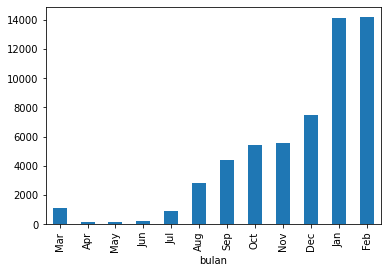

In [33]:
import matplotlib.pyplot as plt

kaltim_bar = kaltim_grouped.groupby(['bulan'])['kasus_baru'].sum()

kaltim_bar.plot.bar()

plt.savefig("kaltim_bar")

<Figure size 432x288 with 0 Axes>

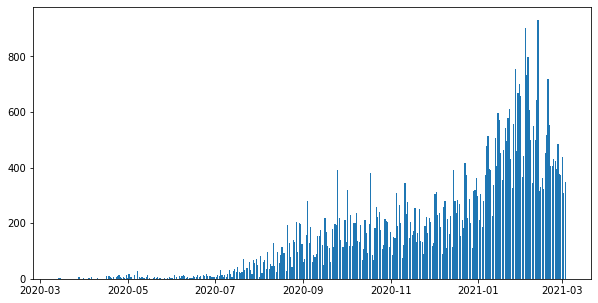

In [34]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_kaltim_tidy, x='tanggal', height='kasus_baru')
plt.show()

# DOUBLE PLOT GRAFIK HARIAN DAN GRAFIK AKUMULATIF - PROV KALTIM

<Figure size 432x288 with 0 Axes>

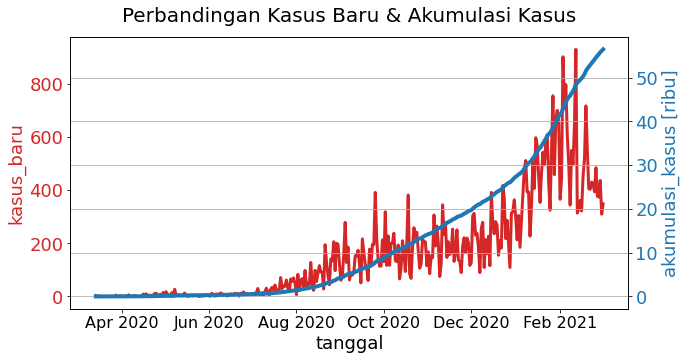

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


data = cov_kaltim_tidy
x = data['tanggal']
y1 = data['kasus_baru']
y2 = data['akumulasi_kasus']

plt.clf()
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Perbandingan Kasus Baru & Akumulasi Kasus', loc='center', pad=15, fontsize=20,)

color = 'tab:red'
ax1.set_xlabel('tanggal', fontsize=18)
ax1.set_ylabel('kasus_baru', color=color, fontsize=18)
ax1.plot(x, y1, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color, labelsize=18)
ax1.tick_params(axis='x', labelsize=16)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('akumulasi_kasus [ribu]', color=color, fontsize=18)  # we already handled the x-label with ax1
ax2.plot(x, y2/1000, color=color, linewidth=4)
ax2.tick_params(axis='y', labelcolor=color, labelsize=18)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.savefig('perbandingan kasus baru & akumulasi kasus.jpg', quality=95, dpi=1000)
plt.show()

<Figure size 432x288 with 0 Axes>

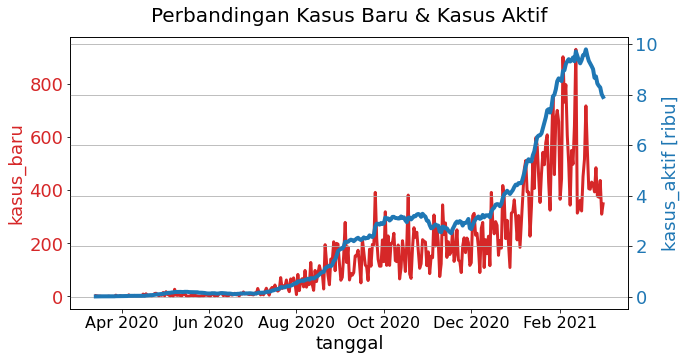

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


data = cov_kaltim_tidy
x = data['tanggal']
y1 = data['kasus_baru']
y2 = data['kasus_aktif']

plt.clf()
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Perbandingan Kasus Baru & Kasus Aktif', loc='center', pad=15, fontsize=20,)

color = 'tab:red'
ax1.set_xlabel('tanggal', fontsize=18)
ax1.set_ylabel('kasus_baru', color=color, fontsize=18)
ax1.plot(x, y1, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color, labelsize=18)
ax1.tick_params(axis='x', labelsize=16)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('kasus_aktif [ribu]', color=color, fontsize=18)  # we already handled the x-label with ax1
ax2.plot(x, y2/1000, color=color, linewidth=4)
ax2.tick_params(axis='y', labelcolor=color, labelsize=18)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.savefig('perbandingan kasus baru & kasus aktif.jpg', quality=95, dpi=1000)
plt.show()

<Figure size 432x288 with 0 Axes>

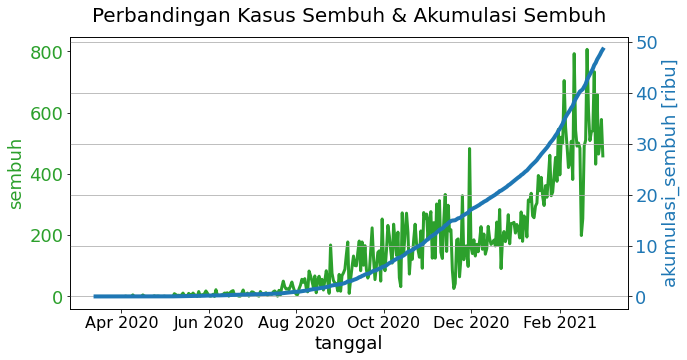

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


data = cov_kaltim_tidy
x = data['tanggal']
y1 = data['sembuh']
y2 = data['akumulasi_sembuh']

plt.clf()
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Perbandingan Kasus Sembuh & Akumulasi Sembuh', loc='center', pad=15, fontsize=20,)

color = 'tab:green'
ax1.set_xlabel('tanggal', fontsize=18)
ax1.set_ylabel('sembuh', color=color, fontsize=18)
ax1.plot(x, y1, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color, labelsize=18)
ax1.tick_params(axis='x', labelsize=16)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('akumulasi_sembuh [ribu]', color=color, fontsize=18)  # we already handled the x-label with ax1
ax2.plot(x, y2/1000, color=color, linewidth=4)
ax2.tick_params(axis='y', labelcolor=color, labelsize=18)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.savefig('perbandingan kasus sembuh & akumulasi sembuh.jpg', quality=95, dpi=1000)
plt.show()

<Figure size 432x288 with 0 Axes>

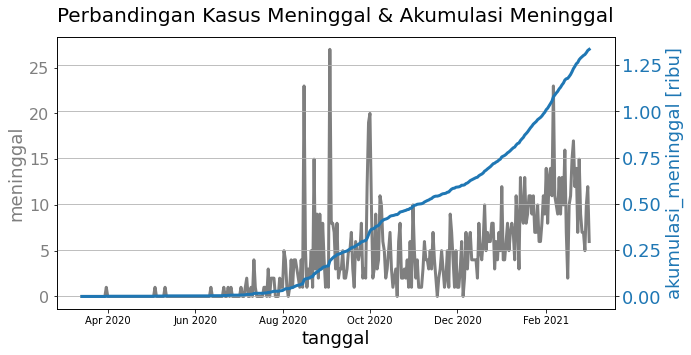

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Pemisalan
data = cov_kaltim_tidy
x = data['tanggal']
y1 = data['meninggal']
y2 = data['akumulasi_meninggal']

plt.clf()
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Perbandingan Kasus Meninggal & Akumulasi Meninggal', loc='center', pad=15, fontsize=20,)

color = 'tab:grey'
ax1.set_xlabel('tanggal', fontsize=18)
ax1.set_ylabel('meninggal', color=color, fontsize=18)
ax1.plot(x, y1, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color, labelsize=18)
ax1.tick_params(axis='y', labelsize=16)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('akumulasi_meninggal [ribu]', color=color, fontsize=18)  # we already handled the x-label with ax1
ax2.plot(x, y2/1000, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color, labelsize=18)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.savefig('perbandingan kasus meninggal & akumulasi meninggal.jpg', quality=95, dpi=1000)
plt.show()

# PROV KALTENG

In [42]:
print('Nama-nama elemen utama:\n', cov_kalteng_raw.keys())
print('\nJumlah total kasus COVID-19 di Kalimantan Tengah                 : %d' %cov_kalteng_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Kalimantan Tengah         : %f.2%%' %cov_kalteng_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Tengah : %f.2%%' %cov_kalteng_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Kalimantan Tengah                 : 14103
Persentase kematian akibat COVID-19 di Kalimantan Tengah         : 2.198114.2%
Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Tengah : 85.953343.2%


In [43]:
import numpy as np
import pandas as pd
cov_kalteng = pd.DataFrame(cov_kalteng_raw['list_perkembangan'])
print('Info cov_kalteng:\n', cov_kalteng.info())
print('\nLima data teratas cov_kalteng:\n', cov_kalteng.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       343 non-null    int64
 1   KASUS                         343 non-null    int64
 2   MENINGGAL                     343 non-null    int64
 3   SEMBUH                        343 non-null    int64
 4   DIRAWAT_OR_ISOLASI            343 non-null    int64
 5   AKUMULASI_KASUS               343 non-null    int64
 6   AKUMULASI_SEMBUH              343 non-null    int64
 7   AKUMULASI_MENINGGAL           343 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  343 non-null    int64
dtypes: int64(9)
memory usage: 24.2 KB
Info cov_kalteng:
 None

Lima data teratas cov_kalteng:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1585180800000      2  ...                    0                             2
1  1585267200

In [44]:
cov_kalteng_tidy = (cov_kalteng.drop(columns=[item for item in cov_kalteng.columns
if item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)
cov_kalteng_tidy['tanggal'] = pd.to_datetime(cov_kalteng_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_kalteng_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  ...  akumulasi_meninggal  akumulasi_dirawat_or_isolasi
0 2020-03-26           2  ...                    0                             2
1 2020-03-27           0  ...                    0                             2
2 2020-03-28           1  ...                    0                             3
3 2020-03-29           0  ...                    0                             3
4 2020-03-30           0  ...                    0                             3

[5 rows x 8 columns]


In [45]:
from datetime import date

x = cov_kalteng_tidy['tanggal']
cov_kalteng_tidy['bulan'] = x.apply(lambda y: y.strftime("%b"))

cov_kalteng_tidy

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,bulan
0,2020-03-26,2,0,0,2,0,0,2,Mar
1,2020-03-27,0,0,0,2,0,0,2,Mar
2,2020-03-28,1,0,0,3,0,0,3,Mar
3,2020-03-29,0,0,0,3,0,0,3,Mar
4,2020-03-30,0,0,0,3,0,0,3,Mar
...,...,...,...,...,...,...,...,...,...
338,2021-02-27,97,0,0,13774,12061,309,1404,Feb
339,2021-02-28,74,0,13,13848,12074,309,1465,Feb
340,2021-03-01,73,0,0,13921,12074,309,1538,Mar
341,2021-03-02,84,0,0,14005,12074,309,1622,Mar


In [46]:
cov_kalteng_tidy['bulan'] = pd.Categorical(cov_kalteng_tidy['bulan'],categories=['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'],ordered=True)
cov_kalteng_tidy.sort_values('bulan',ascending=True)

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,bulan
0,2020-03-26,2,0,0,2,0,0,2,Mar
340,2021-03-01,73,0,0,13921,12074,309,1538,Mar
341,2021-03-02,84,0,0,14005,12074,309,1622,Mar
5,2020-03-31,2,0,2,5,2,0,3,Mar
342,2021-03-03,94,0,0,14099,12074,309,1716,Mar
...,...,...,...,...,...,...,...,...,...
314,2021-02-03,19,95,2,12152,10359,306,1487,Feb
313,2021-02-02,99,0,100,12133,10357,211,1565,Feb
312,2021-02-01,62,0,89,12034,10257,211,1566,Feb
327,2021-02-16,50,0,88,12852,11445,306,1101,Feb


In [47]:
kalteng_grouped = cov_kalteng_tidy.groupby('bulan').sum()
kalteng_grouped

,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi
bulan,,,,,,,
Mar,256,0,2,42043,36224,927,4892
Apr,136,6,11,1417,224,77,1116
May,261,12,113,7472,1849,354,5269
Jun,488,36,226,19392,6577,1098,11717
Jul,835,36,799,40487,21500,2253,16734
Aug,819,17,812,67412,48682,3062,15668
Sep,1097,25,818,92713,70610,3589,18514
Oct,699,18,1067,125204,103992,4406,16806
Nov,1588,43,795,150591,125635,5110,19846


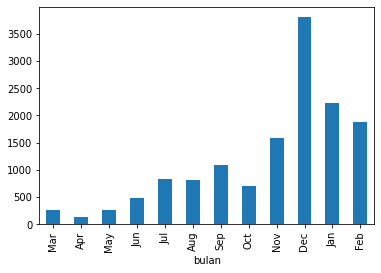

In [48]:
import matplotlib.pyplot as plt

kalteng_bar = kalteng_grouped.groupby(['bulan'])['kasus_baru'].sum()

kalteng_bar.plot.bar()

# PROV KALSEL

In [49]:
print('Nama-nama elemen utama:\n', cov_kalsel_raw.keys())
print('\nJumlah total kasus COVID-19 di Kalimantan Selatan                 : %d' %cov_kalsel_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Kalimantan Selatan         : %f.2%%' %cov_kalsel_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Selatan : %f.2%%' %cov_kalsel_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Kalimantan Selatan                 : 22409
Persentase kematian akibat COVID-19 di Kalimantan Selatan         : 3.302245.2%
Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Selatan : 88.067294.2%


In [50]:
import numpy as np
import pandas as pd
cov_kalsel = pd.DataFrame(cov_kalsel_raw['list_perkembangan'])
print('Info cov_kalsel:\n', cov_kalsel.info())
print('\nLima data teratas cov_kalsel:\n', cov_kalsel.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       339 non-null    int64
 1   KASUS                         339 non-null    int64
 2   MENINGGAL                     339 non-null    int64
 3   SEMBUH                        339 non-null    int64
 4   DIRAWAT_OR_ISOLASI            339 non-null    int64
 5   AKUMULASI_KASUS               339 non-null    int64
 6   AKUMULASI_SEMBUH              339 non-null    int64
 7   AKUMULASI_MENINGGAL           339 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  339 non-null    int64
dtypes: int64(9)
memory usage: 24.0 KB
Info cov_kalsel:
 None

Lima data teratas cov_kalsel:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1585526400000      5  ...                    0                             5
1  158561280000

In [51]:
cov_kalsel_tidy = (cov_kalsel.drop(columns=[item for item in cov_kalsel.columns
if item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)
cov_kalsel_tidy['tanggal'] = pd.to_datetime(cov_kalsel_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_kalsel_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  ...  akumulasi_meninggal  akumulasi_dirawat_or_isolasi
0 2020-03-30           5  ...                    0                             5
1 2020-03-31           2  ...                    0                             7
2 2020-04-01           0  ...                    0                             7
3 2020-04-02           0  ...                    0                             7
4 2020-04-03           0  ...                    0                             7

[5 rows x 8 columns]


In [55]:
from datetime import date

x = cov_kalsel_tidy['tanggal']
cov_kalsel_tidy['bulan'] = x.apply(lambda y: y.strftime("%b"))

cov_kalsel_tidy

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,bulan
0,2020-03-30,5,0,0,5,0,0,5,Mar
1,2020-03-31,2,0,0,7,0,0,7,Mar
2,2020-04-01,0,0,0,7,0,0,7,Apr
3,2020-04-02,0,0,0,7,0,0,7,Apr
4,2020-04-03,0,0,0,7,0,0,7,Apr
...,...,...,...,...,...,...,...,...,...
334,2021-02-27,187,1,128,21666,19238,721,1707,Feb
335,2021-02-28,170,3,43,21836,19281,724,1831,Feb
336,2021-03-01,206,1,91,22042,19372,725,1945,Mar
337,2021-03-02,187,6,102,22229,19474,731,2024,Mar


In [56]:
cov_kalsel_tidy['bulan'] = pd.Categorical(cov_kalsel_tidy['bulan'],categories=['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'],ordered=True)
cov_kalsel_tidy.sort_values('bulan',ascending=True)

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,bulan
0,2020-03-30,5,0,0,5,0,0,5,Mar
336,2021-03-01,206,1,91,22042,19372,725,1945,Mar
337,2021-03-02,187,6,102,22229,19474,731,2024,Mar
338,2021-03-03,179,2,121,22408,19595,733,2080,Mar
1,2020-03-31,2,0,0,7,0,0,7,Mar
...,...,...,...,...,...,...,...,...,...
310,2021-02-03,104,2,45,18340,16145,653,1542,Feb
309,2021-02-02,87,2,64,18236,16100,651,1485,Feb
308,2021-02-01,74,3,58,18149,16036,649,1464,Feb
323,2021-02-16,139,0,52,19977,17420,685,1872,Feb


In [57]:
kalsel_grouped = cov_kalsel_tidy.groupby('bulan').sum()
kalsel_grouped

,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi
bulan,,,,,,,
Mar,579,9,314,66691,58441,2189,6061
Apr,162,9,20,2091,225,161,1705
May,747,77,80,13551,1675,1174,10702
Jun,2231,104,666,61140,9423,4144,47573
Jul,2950,105,2601,143175,55676,7407,80092
Aug,2190,59,2919,223369,144481,9942,68946
Sep,2060,67,2498,282707,228883,11683,42141
Oct,1511,64,1992,348092,305894,14004,28194
Nov,1340,43,1004,375899,340871,15145,19883


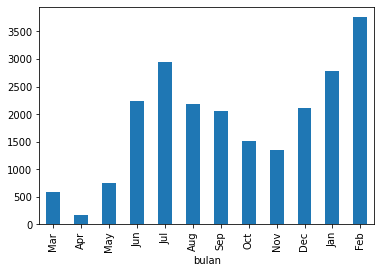

In [58]:
import matplotlib.pyplot as plt

kalsel_bar = kalsel_grouped.groupby(['bulan'])['kasus_baru'].sum()

kalsel_bar.plot.bar()

# PROV KALBAR

In [59]:
print('Nama-nama elemen utama:\n', cov_kalbar_raw.keys())
print('\nJumlah total kasus COVID-19 di Kalimantan Barat                 : %d' %cov_kalbar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Kalimantan Barat         : %f.2%%' %cov_kalbar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Barat : %f.2%%' %cov_kalbar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Kalimantan Barat                 : 4696
Persentase kematian akibat COVID-19 di Kalimantan Barat         : 0.702726.2%
Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Barat : 91.226576.2%


In [60]:
import numpy as np
import pandas as pd
cov_kalbar = pd.DataFrame(cov_kalbar_raw['list_perkembangan'])
print('Info cov_kalbar:\n', cov_kalbar.info())
print('\nLima data teratas cov_kalbar:\n', cov_kalbar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       340 non-null    int64
 1   KASUS                         340 non-null    int64
 2   MENINGGAL                     340 non-null    int64
 3   SEMBUH                        340 non-null    int64
 4   DIRAWAT_OR_ISOLASI            340 non-null    int64
 5   AKUMULASI_KASUS               340 non-null    int64
 6   AKUMULASI_SEMBUH              340 non-null    int64
 7   AKUMULASI_MENINGGAL           340 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  340 non-null    int64
dtypes: int64(9)
memory usage: 24.0 KB
Info cov_kalbar:
 None

Lima data teratas cov_kalbar:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1585440000000      5  ...                    0                             3
1  158552640000

In [61]:
cov_kalbar_tidy = (cov_kalbar.drop(columns=[item for item in cov_kalbar.columns
if item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)
cov_kalbar_tidy['tanggal'] = pd.to_datetime(cov_kalbar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_kalbar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  ...  akumulasi_meninggal  akumulasi_dirawat_or_isolasi
0 2020-03-29           5  ...                    0                             3
1 2020-03-30           1  ...                    0                             4
2 2020-03-31           0  ...                    0                             4
3 2020-04-01           1  ...                    0                             5
4 2020-04-02           0  ...                    1                             4

[5 rows x 8 columns]


In [62]:
from datetime import date

x = cov_kalbar_tidy['tanggal']
cov_kalbar_tidy['bulan'] = x.apply(lambda y: y.strftime("%b"))

cov_kalbar_tidy

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,bulan
0,2020-03-29,5,0,2,5,2,0,3,Mar
1,2020-03-30,1,0,0,6,2,0,4,Mar
2,2020-03-31,0,0,0,6,2,0,4,Mar
3,2020-04-01,1,0,0,7,2,0,5,Apr
4,2020-04-02,0,1,0,7,2,1,4,Apr
...,...,...,...,...,...,...,...,...,...
335,2021-02-27,27,0,25,4598,4168,31,399,Feb
336,2021-02-28,39,0,27,4637,4195,31,411,Feb
337,2021-03-01,0,0,0,4637,4195,31,411,Mar
338,2021-03-02,22,0,25,4659,4220,31,408,Mar


In [63]:
cov_kalbar_tidy['bulan'] = pd.Categorical(cov_kalbar_tidy['bulan'],categories=['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'],ordered=True)
cov_kalbar_tidy.sort_values('bulan',ascending=True)

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,bulan
0,2020-03-29,5,0,2,5,2,0,3,Mar
337,2021-03-01,0,0,0,4637,4195,31,411,Mar
338,2021-03-02,22,0,25,4659,4220,31,408,Mar
339,2021-03-03,34,0,42,4693,4262,31,400,Mar
2,2020-03-31,0,0,0,6,2,0,4,Mar
...,...,...,...,...,...,...,...,...,...
311,2021-02-03,27,0,29,3993,3584,28,381,Feb
310,2021-02-02,37,0,34,3966,3555,28,383,Feb
309,2021-02-01,0,0,0,3929,3521,28,380,Feb
324,2021-02-16,37,0,0,4296,3889,30,377,Feb


In [64]:
kalbar_grouped = cov_kalbar_tidy.groupby('bulan').sum()
kalbar_grouped

,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi
bulan,,,,,,,
Mar,62,0,69,14006,12683,93,1230
Apr,49,1,5,655,137,29,489
May,131,1,44,3943,775,50,3118
Jun,132,0,216,7895,5020,60,2815
Jul,66,0,87,10929,10190,62,677
Aug,258,1,202,14834,12994,64,1776
Sep,337,4,253,24123,20294,144,3685
Oct,673,11,528,41721,34265,268,7188
Nov,750,2,644,62491,47087,598,14806


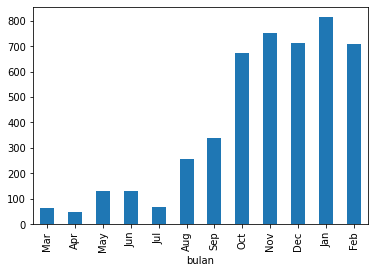

In [65]:
import matplotlib.pyplot as plt

kalbar_bar = kalbar_grouped.groupby(['bulan'])['kasus_baru'].sum()

kalbar_bar.plot.bar()

# PROV KALTARA

In [66]:
print('Nama-nama elemen utama:\n', cov_kaltara_raw.keys())
print('\nJumlah total kasus COVID-19 di Kalimantan Utara                 : %d' %cov_kaltara_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Kalimantan Utara         : %f.2%%' %cov_kaltara_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Utara : %f.2%%' %cov_kaltara_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Kalimantan Utara                 : 9882
Persentase kematian akibat COVID-19 di Kalimantan Utara         : 1.416717.2%
Persentase tingkat kesembuhan dari COVID-19 di Kalimantan Utara : 70.724550.2%


In [67]:
import numpy as np
import pandas as pd
cov_kaltara = pd.DataFrame(cov_kaltara_raw['list_perkembangan'])
print('Info cov_kaltara:\n', cov_kalbar.info())
print('\nLima data teratas cov_kaltara:\n', cov_kaltara.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       340 non-null    int64
 1   KASUS                         340 non-null    int64
 2   MENINGGAL                     340 non-null    int64
 3   SEMBUH                        340 non-null    int64
 4   DIRAWAT_OR_ISOLASI            340 non-null    int64
 5   AKUMULASI_KASUS               340 non-null    int64
 6   AKUMULASI_SEMBUH              340 non-null    int64
 7   AKUMULASI_MENINGGAL           340 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  340 non-null    int64
dtypes: int64(9)
memory usage: 24.0 KB
Info cov_kaltara:
 None

Lima data teratas cov_kaltara:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1585353600000      2  ...                    0                             2
1  1585440000

In [68]:
cov_kaltara_tidy = (cov_kaltara.drop(columns=[item for item in cov_kaltara.columns
if item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)
cov_kaltara_tidy['tanggal'] = pd.to_datetime(cov_kaltara_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_kaltara_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  ...  akumulasi_meninggal  akumulasi_dirawat_or_isolasi
0 2020-03-28           2  ...                    0                             2
1 2020-03-29           0  ...                    0                             2
2 2020-03-30           0  ...                    0                             2
3 2020-03-31           0  ...                    0                             2
4 2020-04-01           0  ...                    0                             2

[5 rows x 8 columns]


In [69]:
from datetime import date

x = cov_kaltara_tidy['tanggal']
cov_kaltara_tidy['bulan'] = x.apply(lambda y: y.strftime("%b"))

cov_kaltara_tidy

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,bulan
0,2020-03-28,2,0,0,2,0,0,2,Mar
1,2020-03-29,0,0,0,2,0,0,2,Mar
2,2020-03-30,0,0,0,2,0,0,2,Mar
3,2020-03-31,0,0,0,2,0,0,2,Mar
4,2020-04-01,0,0,0,2,0,0,2,Apr
...,...,...,...,...,...,...,...,...,...
336,2021-02-27,185,0,0,9622,6800,139,2683,Feb
337,2021-02-28,72,0,0,9694,6800,139,2755,Feb
338,2021-03-01,112,0,26,9806,6826,139,2841,Mar
339,2021-03-02,48,1,163,9854,6989,140,2725,Mar


In [70]:
cov_kaltara_tidy['bulan'] = pd.Categorical(cov_kaltara_tidy['bulan'],categories=['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb'],ordered=True)
cov_kaltara_tidy.sort_values('bulan',ascending=True)

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi,bulan
0,2020-03-28,2,0,0,2,0,0,2,Mar
338,2021-03-01,112,0,26,9806,6826,139,2841,Mar
339,2021-03-02,48,1,163,9854,6989,140,2725,Mar
340,2021-03-03,28,0,0,9882,6989,140,2753,Mar
3,2020-03-31,0,0,0,2,0,0,2,Mar
...,...,...,...,...,...,...,...,...,...
312,2021-02-03,278,5,29,7540,4520,103,2917,Feb
311,2021-02-02,114,1,9,7262,4491,98,2673,Feb
310,2021-02-01,108,8,92,7148,4482,97,2569,Feb
325,2021-02-16,75,0,0,8811,5123,121,3567,Feb


In [71]:
kaltara_grouped = cov_kaltara_tidy.groupby('bulan').sum()
kaltara_grouped

,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_dirawat_or_isolasi
bulan,,,,,,,
Mar,190,1,189,29550,20804,419,8327
Apr,98,1,4,1311,35,20,1256
May,65,1,68,4544,1090,37,3417
Jun,41,0,87,5290,3996,60,1234
Jul,77,0,55,6996,5997,62,937
Aug,101,0,115,10081,8878,62,1141
Sep,193,2,166,14594,12030,85,2479
Oct,245,3,206,21560,18595,177,2788
Nov,643,11,280,31350,25051,357,5942


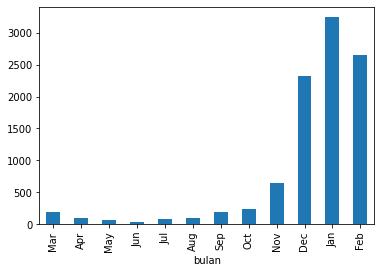

In [72]:
import matplotlib.pyplot as plt

kaltara_bar = kaltara_grouped.groupby(['bulan'])['kasus_baru'].sum()

kaltara_bar.plot.bar()

# GRAFIK PERBANDINGAN

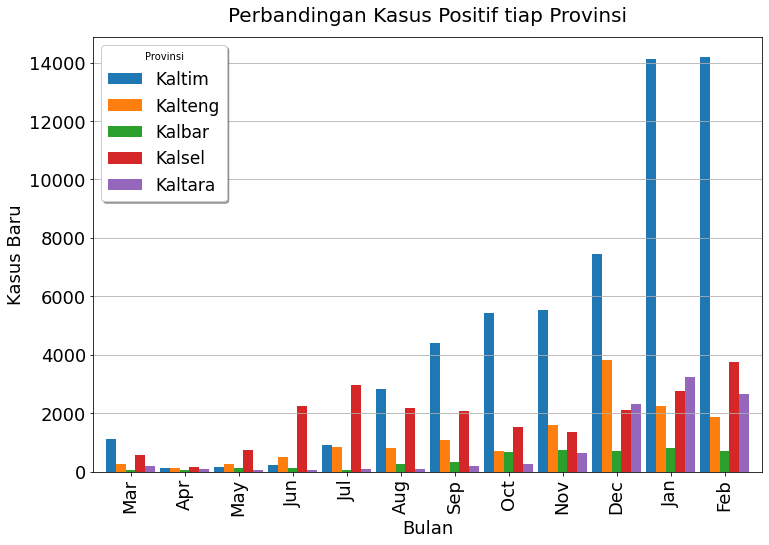

In [73]:
import matplotlib.pyplot as plt
gabung = pd.concat([kaltim_bar, kalteng_bar, kalbar_bar, kalsel_bar, kaltara_bar], axis=1)

gabung.plot.bar(figsize=(12,8), width=0.9)
plt.title('Perbandingan Kasus Positif tiap Provinsi', loc='center', pad=15, fontsize=20)

plt.xlabel('Bulan', fontsize=18)
plt.ylabel('Kasus Baru', fontsize=18)
plt.tick_params(axis='y',labelsize=18)
plt.tick_params(axis='x',labelsize=18)
plt.legend(["Kaltim", "Kalteng", "Kalbar", "Kalsel", "Kaltara"], shadow=True, title='Provinsi', loc='upper left', fontsize=17)
plt.grid(axis='y')
plt.savefig('perbandingan tiap provinsi.jpg', quality=95, dpi=1000)
plt.show()